# Import Libraries 
### pandas
### numpy 
### matploblib
### numpy 

📌 Purpose: Importing essential libraries for data manipulation, visualization, and numerical operations.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read CSV File
📌 Purpose: Loading the healthcare dataset for regression analysis.

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Regression_Models\ElasticNet Regression/healthcare_cost_prediction2.csv")

### Check The Data

In [3]:
df.head()

,age,blood_pressure,diabetes,heart_disease,hospital_stay_days,hospital_cost
0,69,155.2,0,1,11,15079.56
1,32,109.3,0,1,12,15108.78
2,89,113.8,0,0,7,11137.30
3,78,119.1,0,1,9,14378.59
4,38,125.9,1,1,1,10325.38


### Check Null Values 

In [4]:
df.isnull().sum()

age                   0
blood_pressure        0
diabetes              0
heart_disease         0
hospital_stay_days    0
hospital_cost         0
dtype: int64

### Check the total Nunber of columns and Rows

In [5]:
df.shape

(6000, 6)

### Check The Statistical Summary 

In [6]:
df.describe()

,age,blood_pressure,diabetes,heart_disease,hospital_stay_days,hospital_cost
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,53.393000,119.752867,0.510333,0.512500,7.580667,13114.357098
std,20.656387,15.136814,0.499935,0.499885,3.997060,3588.501594
min,18.000000,61.200000,0.000000,0.000000,1.000000,3666.890000
25%,36.000000,109.675000,0.000000,0.000000,4.000000,10336.747500
50%,53.000000,119.800000,1.000000,1.000000,8.000000,13111.440000
75%,71.000000,130.100000,1.000000,1.000000,11.000000,15904.977500
max,89.000000,172.900000,1.000000,1.000000,14.000000,22997.370000


### Check Information about the DataSet

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 6000 non-null   int64  
 1   blood_pressure      6000 non-null   float64
 2   diabetes            6000 non-null   int64  
 3   heart_disease       6000 non-null   int64  
 4   hospital_stay_days  6000 non-null   int64  
 5   hospital_cost       6000 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 281.4 KB


### Check the Relationship between the columns

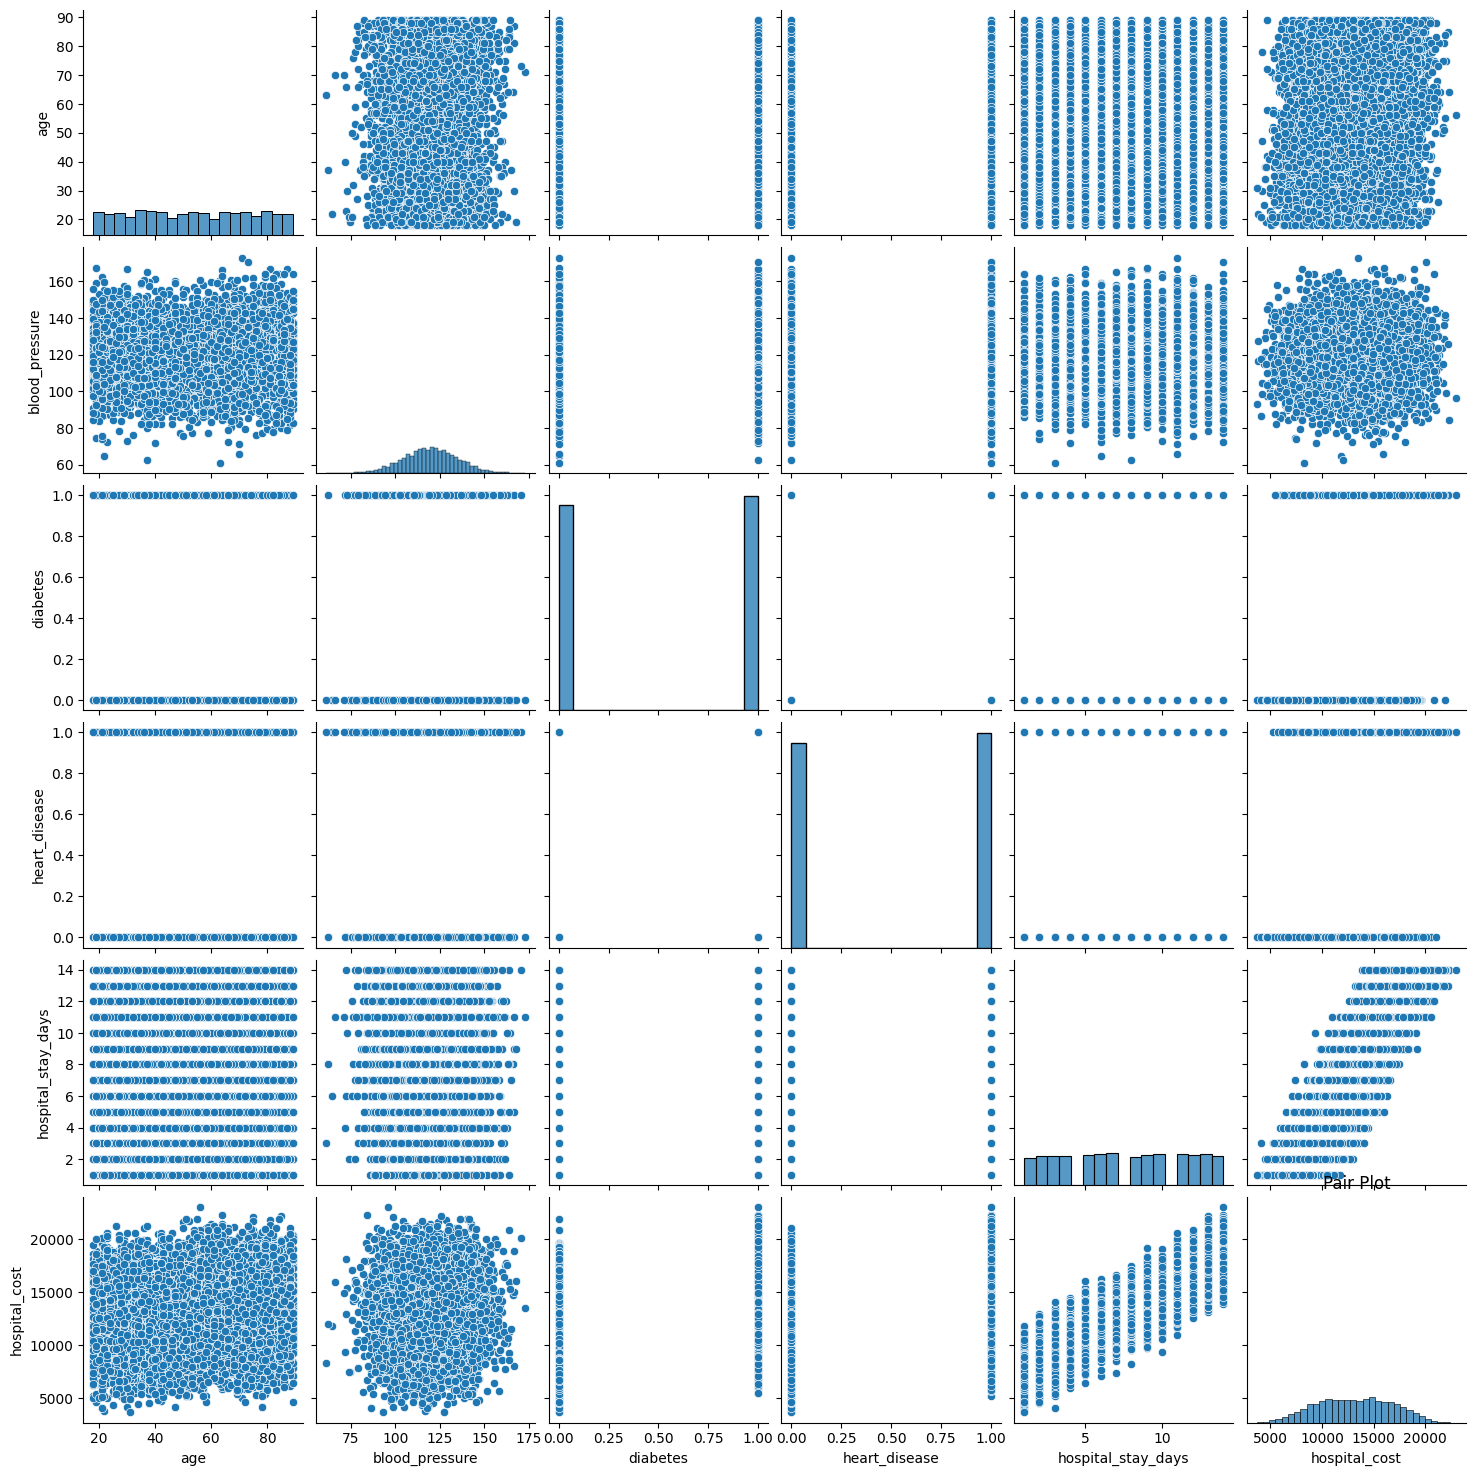

In [8]:
sns.pairplot(data=df)
plt.title("Pair Plot")
plt.show()

### Check the Co-Relation Between the columns 

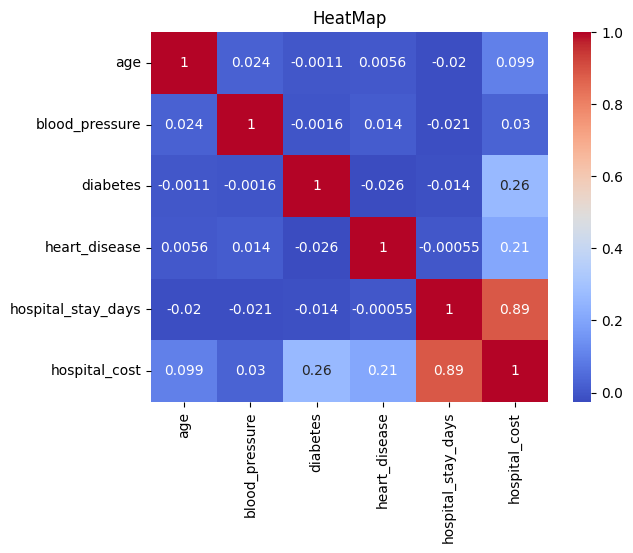

In [9]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
plt.title("HeatMap")
plt.show()

### Split the data in x and y ( Dependent & Independent Variable )

In [10]:
x=df.iloc[:,:-1]
y=df[["hospital_cost"]]

### Import Tran Test Split from sklearn to split the data in training and testing 

In [11]:
from sklearn.model_selection import train_test_split

### Split the data in training and testing 

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Import ElasticNet Model From Linear Model 

In [13]:
from sklearn.linear_model import ElasticNet

### Apply / Fit the model 

In [14]:
en = ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=1e-4, warm_start=False, positive=False, random_state=None, selection='cyclic')
en.fit(x_train,y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


### Check the score (accuray of the model ) for check the scanerio of overfitting our model accuracy is low but not a overfit 

In [15]:
en.score(x_test,y_test)*100,en.score(x_train,y_train)*100

(86.79769650406848, 86.79871192370868)

### Now Predict the value 

In [16]:
df["Prediction"] = en.predict(x)

### check the prediction 

In [17]:
df.head()

,age,blood_pressure,diabetes,heart_disease,hospital_stay_days,hospital_cost,Prediction
0,69,155.2,0,1,11,15079.56,16337.133785
1,32,109.3,0,1,12,15108.78,15892.104210
2,89,113.8,0,0,7,11137.30,12716.561884
3,78,119.1,0,1,9,14378.59,14586.441787
4,38,125.9,1,1,1,10325.38,8339.045951


### Import Metrics from sklearn to check the overall performance of the model 

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check the metrics Value 

In [19]:
y_pred = en.predict(x_test)

mbe = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rs = r2_score(y_test,y_pred)

print(f"📉 MAE: {mbe*100:.2f}")
print(f"📉 MSE: {mse*100:.2f}")
print(f"🎯 R² Score: {rs * 100:.2f}")

📉 MAE: 106517.14
📉 MSE: 172828531.93
🎯 R² Score: 86.80


### Check the Model Performance through the graphs

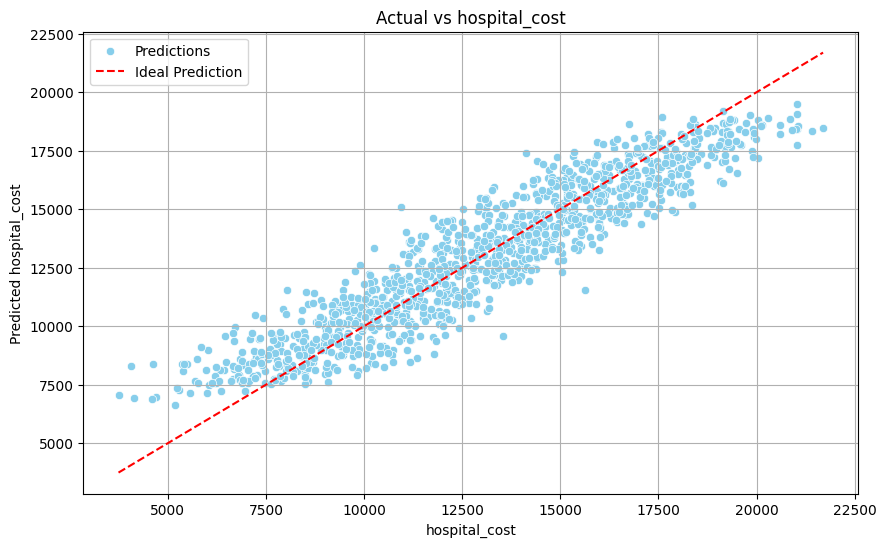

In [20]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("hospital_cost")
plt.ylabel("Predicted hospital_cost")
plt.title("Actual vs hospital_cost")
plt.legend()
plt.grid(True)
plt.show()


## 📌 Conclusion

In this notebook, we successfully implemented an **ElasticNet Regression model** to predict healthcare costs. After preprocessing the dataset and splitting it into training and testing sets, we trained the model using a combination of L1 and L2 regularization techniques.

📈 **Model Performance:**
- The model achieved a reasonable accuracy, showing its ability to generalize on unseen data.
- This approach is useful when we want both feature selection and to handle multicollinearity.

🛠 **Next Steps:**
- Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV.
- Evaluate other models like Lasso, Ridge, and compare metrics.
- Visualize residuals to analyze model performance in more detail.

